In [93]:
import pandas as pd
import numpy as np
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models, utils
import matplotlib.pyplot as plt
from skimage import io, transform
from PIL import Image
import sklearn.metrics as mt
from os import path
import copy
import chexpert as chx
from importlib import reload
import itertools
reload(chx)
# %matplotlib inline

<module 'chexpert' from '/Users/habbes/code/class/bd4h/chexpert/chexpert.py'>

In [71]:
trainer = chx.Trainer(max_train_samples=1, epochs=1)

/Users/habbes/anaconda3/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [72]:
trainer.train()

Epoch 0/0
----------
train Loss: 45.0914
val Loss: 0.6324

Training complete in 1m 23s
Least loss:  inf


{'losses': {'train': [45.09137725830078], 'val': [0.6323753610635415]},
 'model': DenseNet(
   (features): Sequential(
     (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
     (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu0): ReLU(inplace)
     (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
     (denseblock1): _DenseBlock(
       (denselayer1): _DenseLayer(
         (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (relu1): ReLU(inplace)
         (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (relu2): ReLU(inplace)
         (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
       )
       (denselayer2): _DenseLayer(
         (norm1): BatchNorm2

In [111]:
torch.sum(torch.tensor([1, 2]))

tensor(3)

In [144]:
torch.from_numpy(np.array([1.0, 0.0]).astype(np.float32)).type()

'torch.FloatTensor'

In [120]:
df= pd.read_csv('../homework5/data/seizure/seizure_validation.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,-113,-92,-67,-37,24,63,85,62,9,-24,...,22,19,17,10,16,5,45,75,102,5
1,518,352,-94,-530,-938,-1003,-788,-300,291,831,...,-757,19,413,628,607,364,-108,-661,-1091,1
2,39,22,17,-13,-45,-63,-74,-92,-79,-87,...,108,101,80,88,87,91,110,112,124,2
3,8,31,-25,-57,-85,-87,-58,-40,-25,-33,...,-103,-72,-65,-40,-69,-44,-35,22,17,3
4,-41,-58,-89,-90,-91,-77,-40,-47,-18,26,...,42,25,-6,-37,-56,-76,-98,-99,-99,4


In [125]:
df['y'].values

array([5, 1, 2, ..., 5, 1, 2])

In [133]:
torch.double

torch.float64

In [135]:
torch.float64 == np.float64

False

In [9]:
ds = chx.get_dataset('train')

In [10]:
ld = chx.get_loader(ds)

In [11]:
inputs, labels = next(iter(ld))
inputs, labels

(tensor([[[[ 2.2318, -0.0972, -1.8610,  ..., -0.0287, -0.1999, -0.3541],
           [-0.1999, -1.1247, -1.7925,  ..., -0.0458, -0.2171, -0.2856],
           [-1.7925, -1.7754, -1.7412,  ...,  0.0227, -0.0629, -0.0801],
           ...,
           [-0.0116,  0.0912,  0.1426,  ...,  1.2557,  1.2557,  1.2043],
           [ 0.0398,  0.1597,  0.2111,  ...,  1.2557,  1.2385,  1.2214],
           [ 0.1254,  0.2282,  0.2453,  ...,  1.2385,  1.2385,  1.2557]],
 
          [[ 2.4111,  0.0301, -1.7731,  ...,  0.1001, -0.0749, -0.2325],
           [-0.0749, -1.0203, -1.7031,  ...,  0.0826, -0.0924, -0.1625],
           [-1.7031, -1.6856, -1.6506,  ...,  0.1527,  0.0651,  0.0476],
           ...,
           [ 0.1176,  0.2227,  0.2752,  ...,  1.4132,  1.4132,  1.3606],
           [ 0.1702,  0.2927,  0.3452,  ...,  1.4132,  1.3957,  1.3782],
           [ 0.2577,  0.3627,  0.3803,  ...,  1.3957,  1.3957,  1.4132]],
 
          [[ 2.6226,  0.2522, -1.5430,  ...,  0.3219,  0.1476, -0.0092],
           [ 

In [12]:
outputs = trainer.model(inputs)

In [13]:
torch.max(outputs, 1)[1]

tensor([3, 4, 3, 4, 2, 4, 3, 4, 4, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4,
        3, 3, 3, 4, 4, 4, 2, 3, 2, 4, 3, 3, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4,
        4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4])

In [14]:
outputs

tensor([[-1.3407, -0.1243,  0.0027,  0.2877, -0.0491],
        [-1.2140, -0.1208,  0.0457, -0.1367,  0.5960],
        [-1.5283, -0.2450, -0.1017,  0.5125,  0.4763],
        [-1.6874, -0.1369, -0.0387,  0.7252,  0.7536],
        [-1.1826, -0.2164,  0.2043,  0.1021,  0.1759],
        [-2.1674, -0.0685,  0.0157,  0.6758,  0.8981],
        [-1.2602, -0.0887,  0.2340,  0.6651,  0.3025],
        [-1.3071, -0.2553,  0.3385,  0.3724,  0.7248],
        [-1.1613, -0.2337, -0.0757, -0.0931,  0.1262],
        [-1.2995, -0.4762,  0.7583,  0.3769,  0.1841],
        [-1.4604, -0.1231, -0.0080, -0.1909,  0.2397],
        [-1.1260, -0.2564,  0.1153,  0.2298,  0.1452],
        [-1.6675, -0.3115,  0.0554,  0.3911,  0.5204],
        [-1.4139,  0.2956, -0.9448,  0.3024,  0.4387],
        [-1.1208, -0.5912,  0.2748,  0.0924,  0.4877],
        [-2.2688, -0.3634,  0.1683, -0.1805,  0.4703],
        [-0.5679,  0.0490,  0.2596,  0.1235,  0.5534],
        [-1.6871, -0.3260, -0.2862,  0.0409,  0.5899],
        [-

In [183]:
labels.data

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 1.],
        [0., 1., 0., 1., 1.],
        [0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0.],
        [0., 0., 0., 1., 1.],
        [0

In [3]:
data = pd.read_csv(chx.TRAIN_CSV)

In [6]:
data.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [15]:
torch.sigmoid(outputs)

tensor([[0.2074, 0.4690, 0.5007, 0.5714, 0.4877],
        [0.2290, 0.4698, 0.5114, 0.4659, 0.6447],
        [0.1782, 0.4391, 0.4746, 0.6254, 0.6169],
        [0.1561, 0.4658, 0.4903, 0.6738, 0.6800],
        [0.2346, 0.4461, 0.5509, 0.5255, 0.5439],
        [0.1027, 0.4829, 0.5039, 0.6628, 0.7106],
        [0.2209, 0.4779, 0.5582, 0.6604, 0.5750],
        [0.2130, 0.4365, 0.5838, 0.5920, 0.6737],
        [0.2384, 0.4418, 0.4811, 0.4767, 0.5315],
        [0.2143, 0.3831, 0.6810, 0.5931, 0.5459],
        [0.1884, 0.4693, 0.4980, 0.4524, 0.5596],
        [0.2449, 0.4363, 0.5288, 0.5572, 0.5362],
        [0.1588, 0.4228, 0.5138, 0.5965, 0.6272],
        [0.1956, 0.5734, 0.2799, 0.5750, 0.6080],
        [0.2459, 0.3563, 0.5683, 0.5231, 0.6196],
        [0.0937, 0.4101, 0.5420, 0.4550, 0.6155],
        [0.3617, 0.5123, 0.5645, 0.5308, 0.6349],
        [0.1562, 0.4192, 0.4289, 0.5102, 0.6433],
        [0.2146, 0.3293, 0.5309, 0.5388, 0.7259],
        [0.3888, 0.4700, 0.5248, 0.5181, 0.5140],


In [37]:
mt.roc_auc_score(labels.data.numpy(), torch.sigmoid(outputs.detach()).cpu().numpy())

0.4483598189298289

In [36]:
auc = 0
for i in range(5):
    auc = auc + mt.roc_auc_score(labels.data.numpy()[:, i], torch.sigmoid(outputs.detach()).cpu().numpy()[:, i])
auc / 5

0.4483598189298289

In [39]:
a = np.zeros((3, 5))
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [43]:
np.vstack((a, np.ones((2, 5))))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [44]:
a = np.array()

TypeError: Required argument 'object' (pos 1) not found

In [45]:
z = np.zeros((5, 5))

In [46]:
z

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [47]:
z[:3] = np.ones((3, 5))

In [48]:
z

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [52]:
z[3:] = np.random.randn(2, 5)

In [53]:
z

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.87677682, -0.32912366,  2.40084686, -0.53751465, -1.12068897],
       [ 0.04984101,  0.38449303,  1.03283083, -0.82612977, -0.76861185]])

In [64]:
len(chx.get_loader(chx.get_dataset('val')).dataset)

234

In [73]:
trainer.evaluate()

(array([[0.52143323, 0.43433616, 0.4848245 , 0.43860155, 0.43296194],
        [0.4951431 , 0.42846817, 0.3738751 , 0.32293898, 0.5169839 ],
        [0.5071329 , 0.3970112 , 0.3356376 , 0.40970308, 0.5206939 ],
        ...,
        [0.4308492 , 0.43962047, 0.2402116 , 0.27081925, 0.51868653],
        [0.38787892, 0.43427956, 0.40130597, 0.26635337, 0.5520994 ],
        [0.3880672 , 0.4608953 , 0.34106833, 0.24546358, 0.49537733]],
       dtype=float32), array([[1., 0., 0., 0., 1.],
        [1., 1., 0., 0., 1.],
        [1., 0., 0., 1., 0.],
        ...,
        [0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0.]], dtype=float32))

In [75]:
y_pred, y_true = trainer.evaluate()

In [85]:
fpr, tpr, th = mt.roc_curve(y_true[:, 0], y_pred[:, 0])

In [82]:
y_true

(234, 5)

In [87]:
mt.auc(fpr, tpr)

0.5569805194805195

In [88]:
mt.roc_auc_score(y_true[:, 0], y_pred[:, 0])

0.5569805194805195

<Figure size 432x288 with 0 Axes>

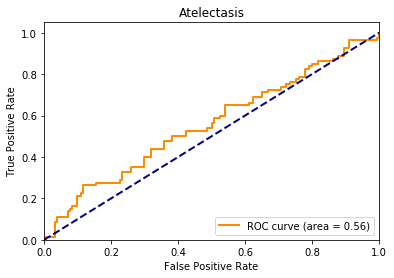

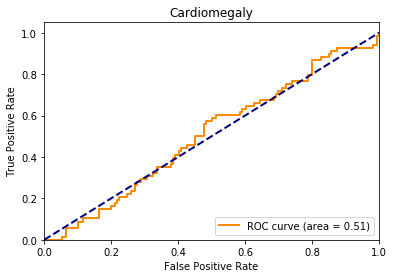

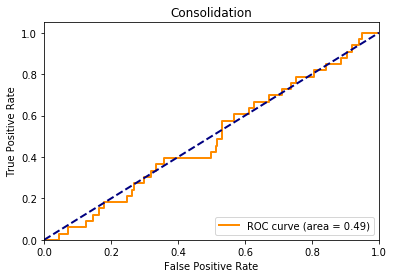

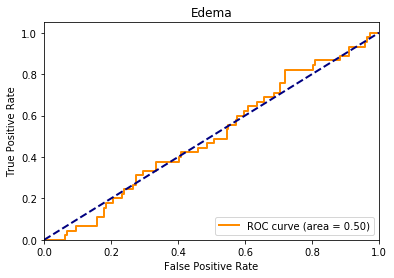

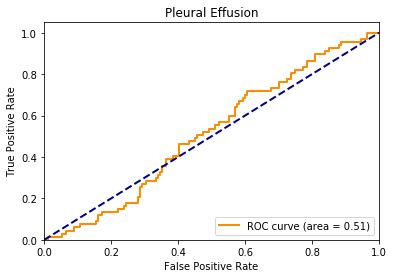

In [94]:
chx.plot_aucs(y_true, y_pred)

In [ ]:
plt.plot()